In [1]:
from tda import auth, client
import json

token_path = R'.\token.pickle'
api_key = 'DRSMU4TL964FO3QNBQHVL78X9SUPGGIL@AMER.OAUTHAP'
redirect_uri = "http://localhost"
try:
    c = auth.client_from_token_file(token_path, api_key)
except FileNotFoundError:
    from selenium import webdriver
    with webdriver.Chrome() as driver:
        c = auth.client_from_login_flow(
            driver, api_key, redirect_uri, token_path)

In [2]:
p = client.Client.Account.Fields("positions")

In [3]:
a = c.get_accounts(fields=p)

In [4]:
assert a.status_code == 200, a.raise_for_status()
data = a.json()

In [5]:
import pandas as pd

In [6]:
dictd = data[0]

In [7]:
df = pd.json_normalize(data[0])

In [8]:
account_dataframes = []
for accountId, value in dictd.items():
    account_dataframes.append(pd.io.json.json_normalize(value))
    account_dataframes[-1].columns = [
        c.replace("securitiesAccount.", "")
        for c in account_dataframes[-1].columns
    ]

pd.concat(account_dataframes)

,type,accountId,roundTrips,isDayTrader,isClosingOnlyRestricted,positions,initialBalances.accruedInterest,initialBalances.availableFundsNonMarginableTrade,initialBalances.bondValue,initialBalances.buyingPower,...,currentBalances.bondValue,projectedBalances.availableFunds,projectedBalances.availableFundsNonMarginableTrade,projectedBalances.buyingPower,projectedBalances.dayTradingBuyingPower,projectedBalances.dayTradingBuyingPowerCall,projectedBalances.maintenanceCall,projectedBalances.regTCall,projectedBalances.isInCall,projectedBalances.stockBuyingPower
0,MARGIN,220535376,0,False,False,"[{'shortQuantity': 0.0, 'averagePrice': 42.43,...",0.0,2412.96,0.0,5758.2,...,0.0,2431.47,2431.47,5758.2,0.0,0.0,0.0,0.0,False,5758.2


In [9]:
raw_positions = pd.json_normalize(df["securitiesAccount.positions"][0])

In [10]:
posit = raw_positions[["currentDayProfitLossPercentage", "instrument.symbol"]]

In [17]:
posit_list

[[3.22, 'XPEV'],
 [1.63, 'AAPL_032621P128'],
 [-2.19, 'AAPL_032621P131'],
 [29.15, 'PTON_031921P120'],
 [-24.6, 'PTON_031921P125'],
 [-12.43, 'DIS_031921P170'],
 [15.83, 'DIS_031921P175'],
 [5.7, 'NIO'],
 [-40.21, 'AMD_031921C100'],
 [4.68, 'AMD_012122C80'],
 [25.93, 'RKT_031921P16'],
 [5.73, 'NET_031921P75'],
 [-3.41, 'NET_031921P80'],
 [-4.9, 'FB_031921P250'],
 [-4.15, 'FB_031921P255']]

In [25]:
def save_as_table(colname, dataset, colwdith, savename):
    colLabels=colname
    nrows, ncols = len(dataset)+1, len(colLabels)
    hcell, wcell = 0.3, 2.5
    hpad, wpad = 0, 0    
    fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
    ax = fig.add_subplot(111)
    ax.axis('off')
    #do the table
    the_table = ax.table(cellText=dataset,
            colLabels=colLabels,
            loc='center',
            cellLoc='center',
            colWidths=colwdith)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(15)
    the_table.scale(1.2,2)
    plt.savefig(savename, bbox_inches="tight", orientation="landscape", dpi=300)

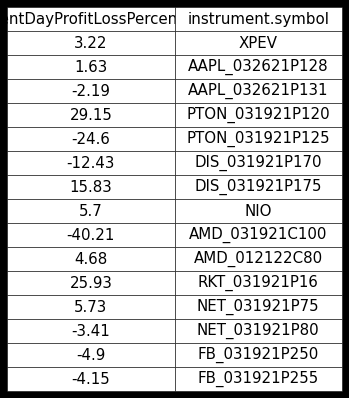

In [34]:
save_as_table((list(posit.columns)),posit_list,[0.5,0.5],"positions.png")

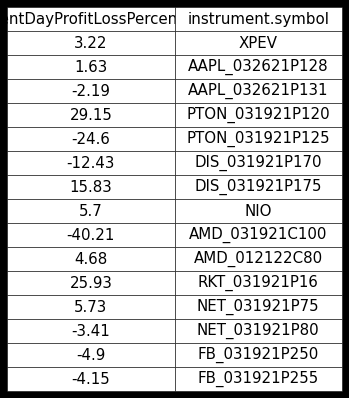

In [33]:
matplotlib.rcParams.update({'text.color': 'black'})

colLabels=list(posit.columns)
nrows, ncols = len(posit_list)+1, len(colLabels)
hcell, wcell = 0.3, 2.5
hpad, wpad = 0, 0    
fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
ax = fig.add_subplot(111)
ax.axis('off')
#do the table
the_table = ax.table(cellText=posit_list,
          colLabels=colLabels,
          loc='center',
          cellLoc='center',
          colWidths=[0.5,0.5])
the_table.auto_set_font_size(False)
the_table.set_fontsize(15)
the_table.scale(1.2,2)
plt.savefig("positions.png", bbox_inches="tight", orientation="landscape", dpi=300)

## Option Testing

In [8]:
para = c.Options

In [4]:
chains = c.get_option_chain(symbol="AAPL", contract_type=para.ContractType.PUT, strategy=para.Strategy.VERTICAL, option_type=para.Type.STANDARD)

In [6]:
initial = pd.json_normalize(chains.json(), record_path="monthlyStrategyList")
filtered = initial[initial["daysToExp"] < 42]

In [7]:
filtered

,month,year,day,daysToExp,secondaryMonth,secondaryYear,secondaryDay,secondaryDaysToExp,type,secondaryType,leap,optionStrategyList,secondaryLeap
0,Feb,2021,26,5,Feb,2021,26,5,P,P,False,"[{'primaryLeg': {'symbol': 'AAPL_022621P101', ...",False
1,Mar,2021,5,12,Mar,2021,5,12,P,P,False,"[{'primaryLeg': {'symbol': 'AAPL_030521P119', ...",False
2,Mar,2021,12,19,Mar,2021,12,19,P,P,False,"[{'primaryLeg': {'symbol': 'AAPL_031221P119', ...",False
3,Mar,2021,19,26,Mar,2021,19,26,P,P,False,"[{'primaryLeg': {'symbol': 'AAPL_031921P116', ...",False
4,Mar,2021,26,33,Mar,2021,26,33,P,P,False,"[{'primaryLeg': {'symbol': 'AAPL_032621P119', ...",False
5,Apr,2021,1,39,Apr,2021,1,39,P,P,False,"[{'primaryLeg': {'symbol': 'AAPL_040121P119', ...",False


In [9]:
spreads = pd.json_normalize(filtered["optionStrategyList"].explode())

In [11]:
rando_data

,strategyStrike,strategyBid,strategyAsk,primaryLeg.symbol,primaryLeg.putCallInd,primaryLeg.description,primaryLeg.bid,primaryLeg.ask,primaryLeg.range,primaryLeg.strikePrice,primaryLeg.totalVolume,secondaryLeg.symbol,secondaryLeg.putCallInd,secondaryLeg.description,secondaryLeg.bid,secondaryLeg.ask,secondaryLeg.range,secondaryLeg.strikePrice,secondaryLeg.totalVolume
6,65.0/60.0,1.95,2.35,FTCH_031921P65,P,FTCH Mar 19 2021 65 Put,5.55,5.75,OTM,65.0,173.0,FTCH_031921P60,P,FTCH Mar 19 2021 60 Put,3.4,3.60,OTM,60.0,222.0
33,60.0/55.0,1.65,2.20,RUN_031921P60,P,RUN Mar 19 2021 60 Put,4.20,4.50,OTM,60.0,1260.0,RUN_031921P55,P,RUN Mar 19 2021 55 Put,2.3,2.55,OTM,55.0,232.0
9,115.0/110.0,1.90,2.60,U_031921P115,P,U Mar 19 2021 115 Put,6.80,7.10,OTM,115.0,396.0,U_031921P110,P,U Mar 19 2021 110 Put,4.5,4.90,OTM,110.0,709.0


In [13]:
rando_data = []

for i in df["Ticker"].to_list():
    try: 
        chains = c.get_option_chain(symbol=i, contract_type=para.ContractType.PUT, strategy=para.Strategy.VERTICAL, option_type=para.Type.STANDARD)
        initial = pd.json_normalize(chains.json(), record_path="monthlyStrategyList")
        filtered = initial[initial["daysToExp"] < 45]
        spreads = pd.json_normalize(filtered["optionStrategyList"].explode())
        output = spreads.loc[(spreads["strategyBid"]>1.40) & (spreads["primaryLeg.range"]=="OTM")]
        rando_data.append(output)

    except:
        pass

rando_data = pd.concat(rando_data)

In [23]:
rando_data.iloc[:,:6].columns

Index(['strategyStrike', 'strategyBid', 'strategyAsk', 'primaryLeg.symbol',
       'primaryLeg.putCallInd', 'primaryLeg.description'],
      dtype='object')

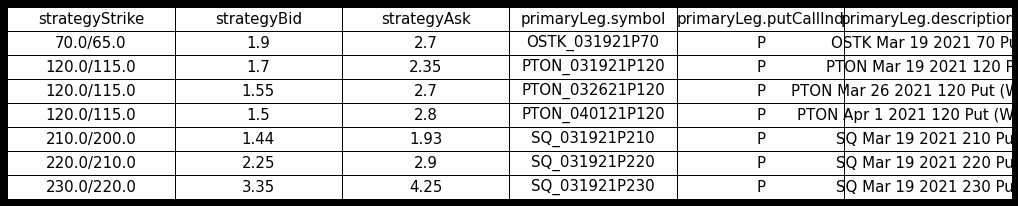

In [29]:
matplotlib.rcParams.update({'text.color': 'black'})
save_as_table(list(rando_data.iloc[:,:6].columns),rando_data.iloc[:,:6].values.tolist(),None,"chains.png")

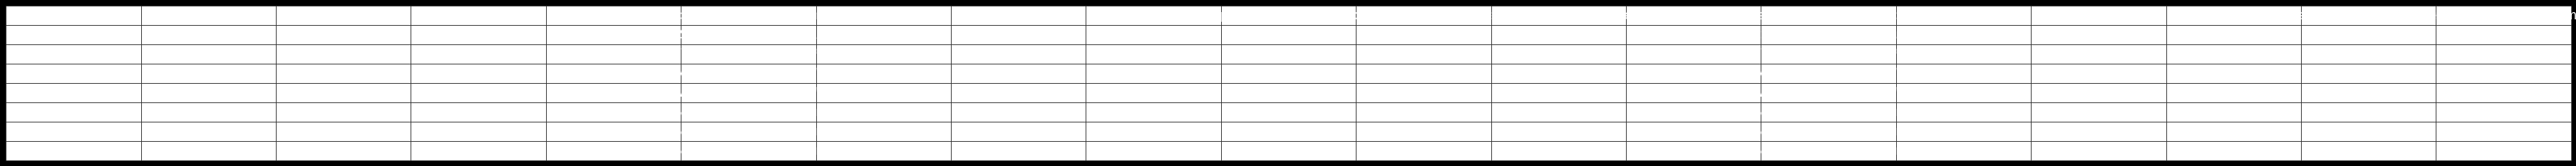

In [31]:
colLabels=list(rando_data.columns)
nrows, ncols = len(rando_data.values.tolist())+1, len(colLabels)
hcell, wcell = 0.3, 2.5
hpad, wpad = 0, 0    
fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
ax = fig.add_subplot(111)
ax.axis('off')
#do the table
the_table = ax.table(cellText=rando_data.values.tolist(),
          colLabels=colLabels,
          loc='center',
          cellLoc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(15)
the_table.scale(1.2,2)
plt.savefig("positions.png", bbox_inches="tight", orientation="landscape", dpi=300)

In [34]:
possible = rando_data.to_html().replace("\n", "")

# Email Testing

In [18]:
import yagmail

In [19]:
yag = yagmail.SMTP("trashmail.imtrash@gmail.com","trash6969")

In [35]:
name = ["Your positions: \n\n", "Finviz scan: \n\n", recco, "Possible new positions: \n\n", possible]

In [36]:
yag.send(to='zacharylim98@gmail.com', contents=name)

{}

In [72]:
position = raw_positions[["instrument.symbol", "averagePrice"]].to_html().replace("\n","")

# Finviz Scanning

In [9]:
from finviz.screener import Screener
import nest_asyncio
nest_asyncio.apply()

In [10]:
filter = ["an_recom_buybetter","cap_midover","sh_avgvol_o2000","sh_curvol_o5000","sh_opt_option","sh_price_o10","ta_pattern_horizontal","ta_perf_ddown"]
daily_scan = Screener(filters=filter, table="Overview")

In [11]:
df = pd.json_normalize(daily_scan.data)

In [12]:
df

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2101.79B,33.89,125.35,-0.41%,"110,253,255"
1,2,ATVI,"Activision Blizzard, Inc.",Communication Services,Electronic Gaming & Multimedia,USA,75.02B,33.85,95.69,-0.76%,"5,897,155"
2,3,AVTR,"Avantor, Inc.",Basic Materials,Specialty Chemicals,USA,16.26B,317.50,27.94,-0.21%,"6,817,472"
3,4,BABA,Alibaba Group Holding Limited,Consumer Cyclical,Internet Retail,China,679.69B,28.07,250.34,-0.95%,"12,720,066"
4,5,BHC,Bausch Health Companies Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,Canada,10.91B,-,31.05,-1.65%,"5,372,096"
5,6,DBX,"Dropbox, Inc.",Technology,Software - Infrastructure,USA,9.85B,-,22.92,-1.12%,"17,249,132"
6,7,EBAY,eBay Inc.,Consumer Cyclical,Internet Retail,USA,40.94B,16.54,59.38,-3.24%,"8,025,928"
7,8,ERIC,Telefonaktiebolaget LM Ericsson (publ),Technology,Communication Equipment,Sweden,43.42B,19.87,12.56,-0.40%,"7,740,806"
8,9,EXC,Exelon Corporation,Utilities,Utilities - Diversified,USA,40.46B,16.52,40.19,-1.50%,"7,775,578"
9,10,FB,"Facebook, Inc.",Communication Services,Internet Content & Information,USA,775.20B,26.21,264.31,-0.58%,"15,675,173"


In [36]:
painting = df[["Ticker","Company","Sector","Price","Change","Volume"]].sort_values(["Sector","Change"], ascending=False)

In [27]:
import matplotlib.pyplot as plt 

In [50]:
list(painting.columns)

['Ticker', 'Company', 'Sector', 'Price', 'Change']

In [58]:
pointing = painting.values.tolist()

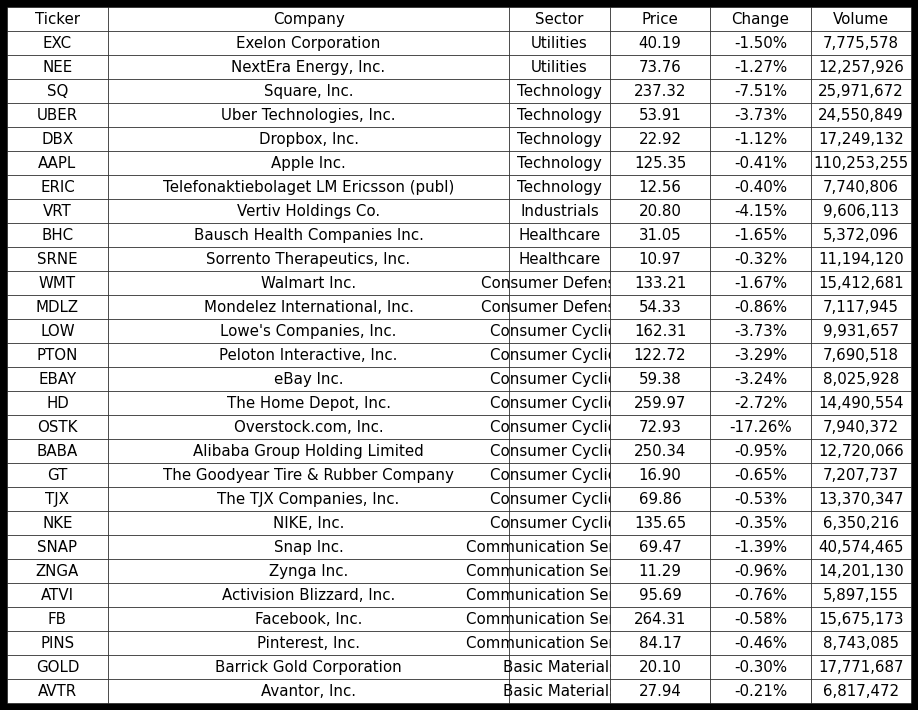

In [37]:
save_as_table(list(painting.columns),painting.values.tolist(),[0.1,0.4,0.1,0.1,0.1,0.1],"recco.png")

In [11]:
def save_as_table(colname, datalist, colwith, filename):
    colLabels=colname,
    nrows, ncols = len(datalist)+1, len(colLabels)
    hcell, wcell = 0.3, 2.5
    hpad, wpad = 0, 0    
    fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
    ax = fig.add_subplot(111)
    ax.axis('off')
    #do the table
    the_table = ax.table(cellText=datalist,
            colLabels=colLabels,
            loc='center',
            cellLoc='center',
            colWidths=colwith)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(15)
    the_table.scale(1.2,2)
    plt.savefig(filename, bbox_inches="tight", orientation="landscape", dpi=300)

In [88]:
len(pointingcol)

6

In [91]:
def prac(datalist):
    print(datalist)

In [92]:
prac(posit_list)

[[2.35, 'XPEV'], [0.0, 'AAPL_032621P128'], [0.0, 'AAPL_032621P131'], [0.0, 'PTON_031921P120'], [0.0, 'PTON_031921P125'], [0.0, 'DIS_031921P170'], [0.0, 'DIS_031921P175'], [1.77, 'NIO'], [0.0, 'AMD_031921C100'], [0.0, 'AMD_012122C80'], [0.0, 'RKT_031921P16'], [0.0, 'NET_031921P75'], [0.0, 'NET_031921P80'], [0.0, 'FB_031921P250'], [0.0, 'FB_031921P255']]


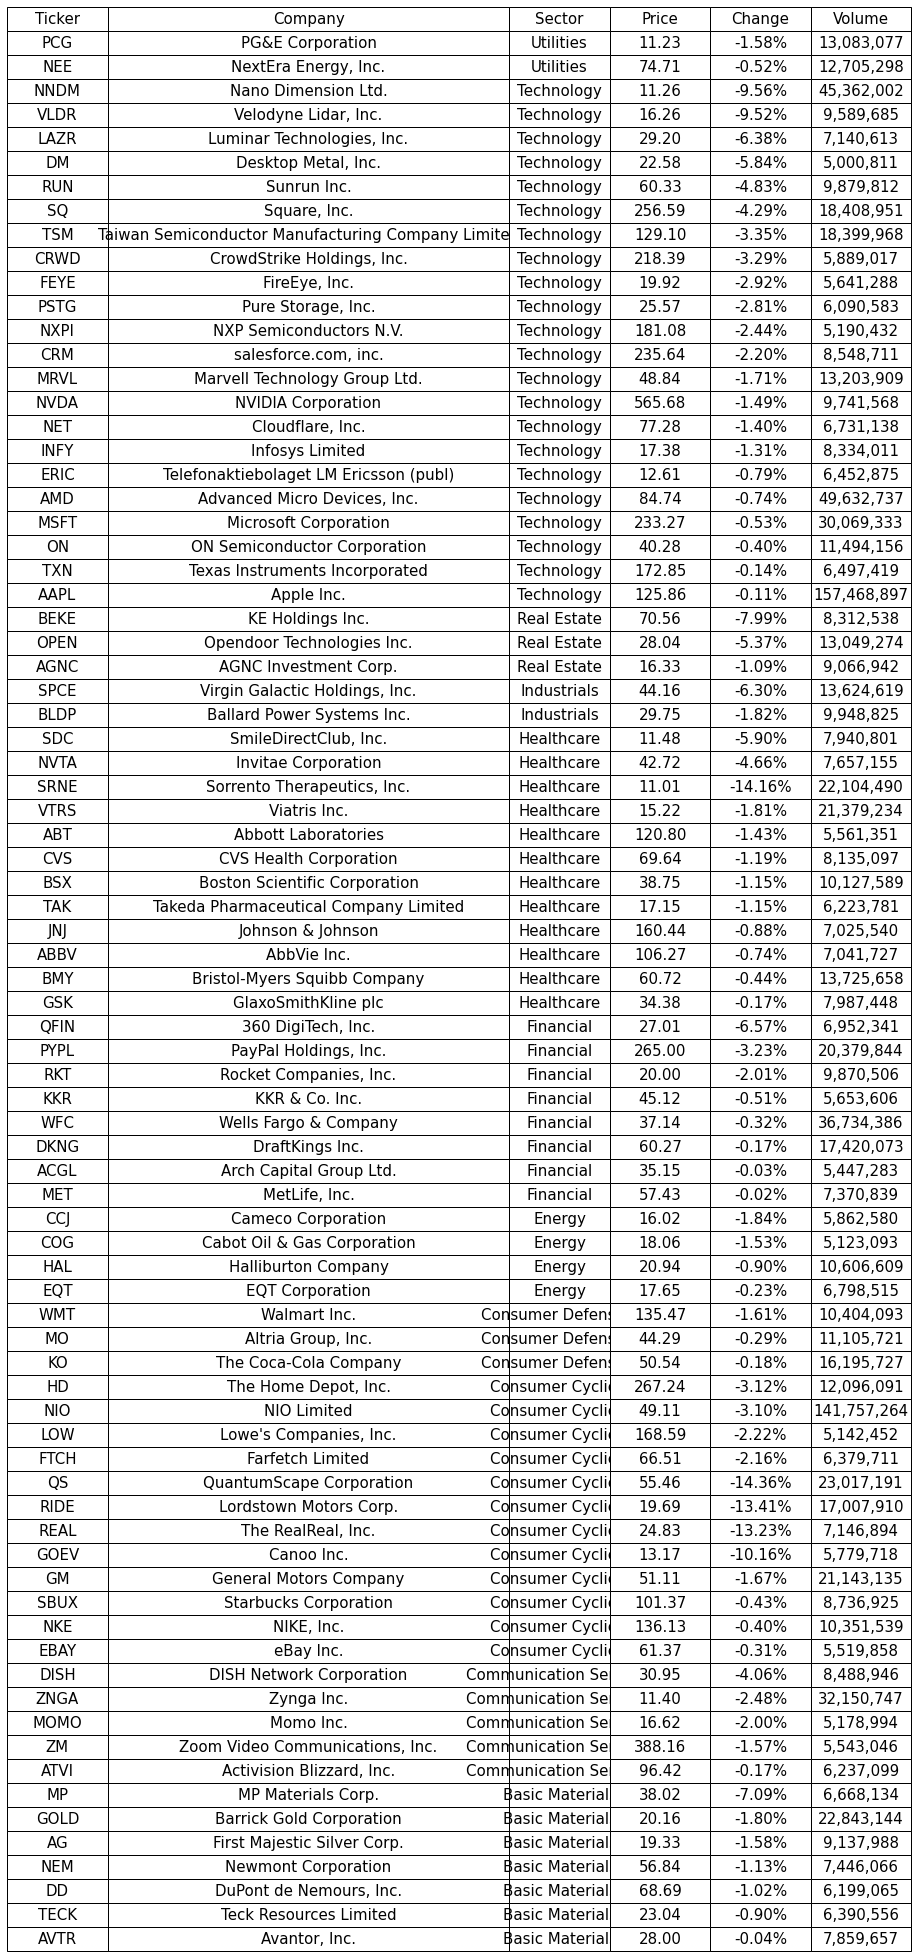

In [83]:
colLabels=list(painting.columns)
nrows, ncols = len(pointing)+1, len(colLabels)
hcell, wcell = 0.3, 2.5
hpad, wpad = 0, 0    
fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
ax = fig.add_subplot(111)
ax.axis('off')
#do the table
the_table = ax.table(cellText=pointing,
          colLabels=colLabels,
          loc='center',
          cellLoc='center',
          colWidths=[0.1,0.4,0.1,0.1,0.1,0.1])
the_table.auto_set_font_size(False)
the_table.set_fontsize(15)
the_table.scale(1.2,2)
plt.savefig("table.png", bbox_inches="tight", orientation="landscape", dpi=300)

In [8]:
df["Chart_URL"] = ["https://finviz.com/chart.ashx?ty=c&p=d&b=1&ta=1&t={}".format(i) for i in df["Ticker"]]

In [9]:
recco = df.to_html(render_links=True).replace("\n","")

# Bible Verse Testing

In [61]:
from bs4 import BeautifulSoup
import requests

def verse_otd():    
    URL = "https://www.bible.com/en-GB"
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, 'html.parser')
    verse = soup.find('p', class_="votd-verse").text.strip()
    ref = soup.find('p', class_="votd-ref").text.strip()
    return(verse, ref)

In [62]:
verse_otd()

('The heavens declare the glory of God; the skies proclaim the work of his hands.',
 'Psalms 19:1 (NIV)')

In [191]:
def spec_verse(book="EPH", chp="3", verse="20"):

    books = {"Genesis" : "GEN", "Exodus" : "EXO"}

    book_norm = dict_bible[book]

    URL = "https://www.bible.com/en-GB/bible/59/{}.{}.{}".format(book_norm, chp, verse)
    page = requests.get(URL)

    soup= BeautifulSoup(page.content, 'html.parser')
    verse = soup.find('div', class_="near-black lh-copy f3-m").text.strip()
    return(verse)

In [197]:
spec_verse(book="Ephesians", chp="3", verse="20")

'Now to him who is able to do far more abundantly than all that we ask or think, according to the power at work within us'

In [164]:
books = {"Genesis" : "GEN", "Exodus" : "EXO"}

In [169]:
cross_ref = pd.read_csv(R"X:\GitHub\personal-improvement\books of bible\crossref.csv")

In [185]:
crd = dict(cross_ref.values)

In [188]:
dict_bible = dict([(value, key) for key, value in crd.items()]) 

In [190]:
dict_bible["Genesis"]

'Gen'

# Telegram Sending

In [14]:
import telegram_send

In [63]:
telegram_send.configure(R"X:\GitHub\beatingENd\BeatingEnDUS\Account Tracking\tdaAPI2\telegramtoken.pickle")

Talk with the BotFather on Telegram (https://telegram.me/BotFather), create a bot and insert the token
Connected with dailysend_bot.

Please add dailysend_bot on Telegram (https://telegram.me/dailysend_bot)
and send it the password: 64686

Congratulations Krismerful! 
telegram-send is now ready for use!


In [31]:
telegram_send.send(messages=["Hi"], images=[file_object4], conf=R".\telegramtoken.pickle",parse_mode="html")

In [8]:
import dataframe_image as dfi

In [30]:
file_object4  = open(R".\chains.png", "rb") 

In [81]:
telegram_send.send(messages=["Good Morning Zach! Here's the verse for the day:", verse,  "Here's a reminder that you are loved and you don't have to take things personally to prove yourself"], files=[ticked], conf=R".\telegramtoken.pickle",parse_mode="markdown")

In [74]:
tikerlist = df["Ticker"].to_list()

In [79]:
tikerlist

f=open('DailyScan.txt','w')
for ele in tikerlist:
    f.write(ele+',')

f.close()

In [80]:
ticked = open(R".\DailyScan.txt", 'rb')

In [93]:
dfi.export(df.sort_values(["Sector","Change"], ascending=False).drop(["Country", "Industry", "Volume"], axis=1), "finviz.jpeg")